# Schmitt Trigger Using an Operational Amplifier

## Import and Formatting

The goal of this section is to import all the necessary files and libraries required for the subsequent data analysis.  
It also includes setting up the formatting parameters for the plots and visualizations.

### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PySpice.Spice.Netlist import (
    Circuit, SubCircuitFactory
)
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.WaveForm import OperatingPoint

### Formatting

Adjusting Plotly chart settings for clarity and consistency.

In [2]:
# ----  Formatting charts
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['axes.edgecolor']  = "#bcbcbc"
mpl.rcParams['patch.linewidth'] = 0.5
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['axes.facecolor']  = "#eeeeee"
mpl.rcParams['axes.labelsize']  = "large"
mpl.rcParams['axes.grid']       = True
mpl.rcParams['grid.linestyle']  = "--"
mpl.rcParams['patch.edgecolor'] = "#eeeeee"
mpl.rcParams['axes.titlesize']  = "x-large"

## Objective

The purpose of this section is to study Schmitt triggers implemented with operational amplifiers. We begin by analyzing the circuit diagram and deriving the equations that govern its behavior. Next, we move on to simulations to illustrate and validate these results. Finally, the last part focuses on potential improvements to the circuit.

## Circuit

To implement an inverting Schmitt trigger, we rely on the following circuit diagram: [](#Opamp-trigger-inverser)

```{figure} ./images/Opamp-trigger-inverser.svg
:name: Opamp-trigger-inverser
:align: center
:width: 500px

Inverting Schmitt trigger using an operational amplifier
```

Two key aspects of this circuit should be highlighted.
First, the input signal is applied to the inverting terminal ($-$) of the operational amplifier. As a result, the output voltage $V_S$ is inverted with respect to the input voltage $V_e$.

Second, there is no feedback loop connected to the inverting input, which means the circuit operates in a nonlinear mode, since $v^- \neq v^+$. Consequently, the output directly switches between the saturation levels of the operational amplifier, namely $V_{CC}$ and $-V_{CC}$.

## Equations

The threshold voltage of the Schmitt trigger is given by:

$$
V_\text{threshold} = \frac{R_1}{R_1 + R_2} \cdot V_{CC}
$$

From this expression, the following equations apply depending on the output saturation state:

**Case where $V_S = V_{CC}$**

$$
\epsilon = V_\text{threshold} - V_e
$$

**Case where $V_S = -V_{CC}$**

$$
\epsilon = -,V_\text{threshold} - V_e
$$

## Demonstration

The purpose of this section is to detail the equations leading to the results obtained previously.

```{figure} ./images/Opamp-trigger-inverser-demonstration.svg
:name: Opamp-trigger-inverser-demonstration
:align: center
:width: 500px

Inverting Schmitt trigger with an operational amplifier (demonstration)
```

As shown in the figure [](#Opamp-trigger-inverser-demonstration), there is no feedback loop connected to the inverting input. We define:

$$
\epsilon = V^+ - V^-
$$

with:

* if $\epsilon < 0 \Rightarrow V_S = -V_{CC}$
* if $\epsilon > 0 \Rightarrow V_S = +V_{CC}$

The output depends solely on the sign of $\epsilon$. To proceed, we calculate the voltages at the op-amp inputs, $V^+$ and $V^-$.

**Voltage $V^+$**

The non-inverting input $V^+$ is connected to a  [*voltage divider*](../../Alimentation/Regulateur/Pond_diviseur_tension), giving:

$$
V^+ = \frac{R_1}{R_1 + R_2} \cdot V_S
$$

**Voltage $V^-$**

The inverting input $V^-$ is directly connected to the input voltage $V_e$. Assuming infinite input impedance for the op-amp:

$$
V^- = V_e
$$

Substituting these expressions into $\epsilon$ yields:

$$
\epsilon = V^+ - V^- = \frac{R_1}{R_1 + R_2} \cdot V_S - V_e
$$

Since $V_S$ can only take two values, $V_{CC}$ or $-V_{CC}$, we consider two cases.

**Case $V_S = V_{CC}$**

$$
\epsilon = \frac{R_1}{R_1 + R_2} \cdot V_{CC} - V_e
$$

**Case $V_S = -V_{CC}$**

$$
\epsilon = -\frac{R_1}{R_1 + R_2} \cdot V_{CC} - V_e
$$

Defining the threshold voltage:

$$
V_\text{threshold} = \frac{R_1}{R_1 + R_2} \cdot V_{CC}
$$

The equations then simplify to:

**Case $V_S = V_{CC}$**

$$
\epsilon = V_\text{threshold} - V_e
$$

**Case $V_S = -V_{CC}$**

$$
\epsilon = - V_\text{threshold} - V_e
$$

## Theoretical Equations

The goal of this section is to derive the theoretical equations so that they can later be compared with the simulation results.

The reference component values are:

* $R_1 = 1 , \text{k}\Omega$
* $R_2 = 1.5 , \text{k}\Omega$

In [3]:
# ------------------------------------------------------------
# Circuit Parameters
# ------------------------------------------------------------
R1   = 1.0e3      # Resistor R1 in ohms
R2   = 1.5e3      # Resistor R2 in ohms
Vsat = 15         # Saturation voltage in volts


# ------------------------------------------------------------
# Threshold Voltage Function
# ------------------------------------------------------------
def V_threshold(R1, R2, Vsat):
    """
    Computes the threshold voltage of a voltage divider.
    """
    return (R1 / (R1 + R2)) * Vsat


# ------------------------------------------------------------
# Threshold Voltage Calculation
# ------------------------------------------------------------
V_threshold_value = V_threshold(R1, R2, Vsat)

print(f"The threshold voltage is: {V_threshold_value:.3f} V")


# ============================================================
# End of Threshold Voltage Calculation
# ============================================================


The threshold voltage is: 6.000 V


## Simulation

Donc l'objectif maintenant est de créer les circuits de simulation.

Dans un premier temps, le circuit est le suivat : 

```{figure} ./images/Opamp-trigger-inverser-space.svg
:name: Opamp-trigger-inverser-space
:align: center
:width: 500px

Trigger de schmitt inverseur avec un AOP (SPICE)
```

Il est possible de créer le circuit sur python.

In [4]:
# ============================================================
# Circuit Definition : Montage Stabilisateur (Zener + BJT)
# ============================================================

# ------------------------------------------------------------
# Circuit Initialization
# ------------------------------------------------------------
circuit = Circuit('Montage Regulateur')

# Include required component libraries
circuit.include('lib/UA741.sub')

# ------------------------------------------------------------
# Input Supply
# ------------------------------------------------------------
f = 2                        # fréquence [Hz]
V_offset = 0                 # offset DC
V_amplitude = 10             # amplitude du signal sin
delay = 0

circuit.SinusoidalVoltageSource(
    'in', 'v-', circuit.gnd,
    offset=V_offset @ u_V,
    amplitude=V_amplitude @ u_V,
    frequency=f @ u_Hz,
    delay=delay @ u_s
)

# ------------------------------------------------------------
# Polarization tension
# ------------------------------------------------------------
V_polarization = 15
circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)

# ------------------------------------------------------------
# Initialisation resistance
# ------------------------------------------------------------
R_1 = 1.0 @ u_kOhm             # R1 [Ω]
R_2 = 1.5 @ u_kOhm             # R2 [Ω]

circuit.R(1, 'v+', circuit.gnd, R_1)
circuit.R(2, 'v+', 'out', R_2)

# ------------------------------------------------------------
# Initialization AOP
# ------------------------------------------------------------
circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'out')

# ------------------------------------------------------------
# Emitter Load
# ------------------------------------------------------------
R_emitter = 820 @ u_Ohm           # Emitter resistor [Ω]

circuit.R('l', 'emetteur', circuit.gnd, R_emitter);

# ============================================================
# End of Circuit Definition
# ============================================================

In [6]:
# ------------------------------------------------------------
# Transient Simulation
# ------------------------------------------------------------
simulator = circuit.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.transient(
    step_time=1@u_ms,    # pas de temps : 1 ms (à ajuster si besoin)
    end_time=2@u_s       # durée totale : 2 secondes
)

# ============================================================
# End of Transient Simulation
# ============================================================

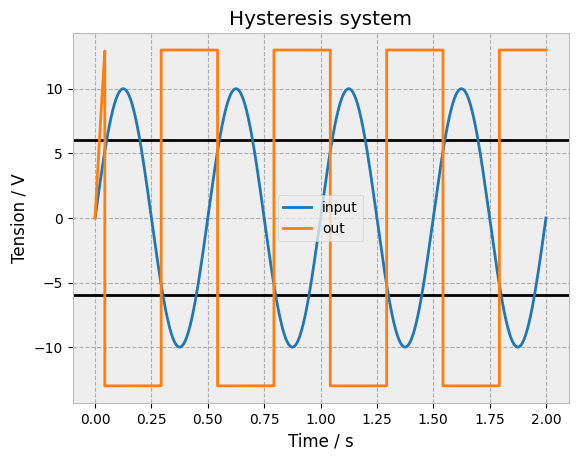

In [7]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Hysteresis system"
)

# Line ref
plt.axhline(6, color="black")
plt.axhline(-6, color="black")

# Load curve
plt.plot(analysis.time, analysis['v-'], label='input')
plt.plot(analysis.time, analysis['out'], label='out')



# Axis labels
plt.xlabel('Time / s')
plt.ylabel('Tension / V')

# Legend
plt.legend()

# Display the plot
plt.show()

It can be observed that the system switches from one state to the other as soon as the input voltage crosses above or below the two black lines that represent the threshold levels. To obtain a clearer understanding of this behavior, we can examine the output voltage as a function of the input voltage.

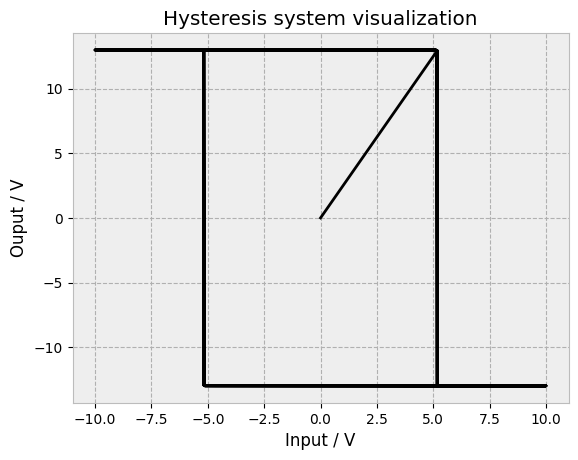

In [8]:
# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================

plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title(
    "Hysteresis system visualization"
)

# Load curve
plt.plot(analysis['v-'], analysis['out'], "black")

# Axis labels
plt.xlabel('Input / V')
plt.ylabel('Ouput / V')

# Display the plot
plt.show()

The output signal behaves as expected: it switches states at approximately (-5 , \text{V}) and (+5 , \text{V}). We can also observe that the width of the hysteresis loop is relatively large. To adjust this hysteresis width, we must modify the following relationship:

$$
V_\text{threshold} = \frac{R_1}{R_1 + R_2} \cdot V_{CC}
$$

The goal of the next section is to examine how this parameter can be controlled.

## Changing the size of the belly in hysteresis

In [9]:
# ------------------------------------------------------------
# Parameter Lists
# ------------------------------------------------------------
list_R1 = (1.0e3, 3.0e3, 0.2e3)   # Values for R1 (ohms)
list_R2 = (1.0e3, 1.0e3, 1.0e3)   # Values for R2 (ohms)

input_list  = []                 # Will store (R1, R2) pairs
output_list = []                 # Will store computed results


for R1, R2 in zip(list_R1, list_R2) :
    # ============================================================
    # Circuit Definition : Montage Stabilisateur (Zener + BJT)
    # ============================================================
    
    # ------------------------------------------------------------
    # Circuit Initialization
    # ------------------------------------------------------------
    circuit = Circuit('Montage Regulateur')
    
    # Include required component libraries
    circuit.include('lib/UA741.sub')
    
    # ------------------------------------------------------------
    # Input Supply
    # ------------------------------------------------------------
    f = 2                        # fréquence [Hz]
    V_offset = 0                 # offset DC
    V_amplitude = 10             # amplitude du signal sin
    delay = 0
    
    circuit.SinusoidalVoltageSource(
        'in', 'v-', circuit.gnd,
        offset=V_offset @ u_V,
        amplitude=V_amplitude @ u_V,
        frequency=f @ u_Hz,
        delay=delay @ u_s
    )
    
    # ------------------------------------------------------------
    # Polarization tension
    # ------------------------------------------------------------
    V_polarization = 15
    circuit.V('cc', 'VCC', circuit.gnd,   V_polarization@u_V)
    circuit.V('ee', 'VEE', circuit.gnd, - V_polarization@u_V)
    
    # ------------------------------------------------------------
    # Initialisation resistance
    # ------------------------------------------------------------
    circuit.R(1, 'v+', circuit.gnd, R1@ u_kOhm )
    circuit.R(2, 'v+', 'out', R2@ u_kOhm)
    
    # ------------------------------------------------------------
    # Initialization AOP
    # ------------------------------------------------------------
    circuit.X('U1', 'UA741', 'v+', 'v-', 'VCC', 'VEE', 'out')
    
    # ------------------------------------------------------------
    # Emitter Load
    # ------------------------------------------------------------
    R_emitter = 820 @ u_Ohm           # Emitter resistor [Ω]
    
    circuit.R('l', 'emetteur', circuit.gnd, R_emitter);
    
    # ============================================================
    # End of Circuit Definition
    # ============================================================

    # ------------------------------------------------------------
    # Transient Simulation
    # ------------------------------------------------------------
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    
    analysis = simulator.transient(
        step_time=1@u_ms,    # pas de temps : 1 ms (à ajuster si besoin)
        end_time=2@u_s       # durée totale : 2 secondes
    )
    
    # ============================================================
    # End of Transient Simulation
    # ============================================================
    input_list.append(analysis['v-'])
    output_list.append(analysis['out'])

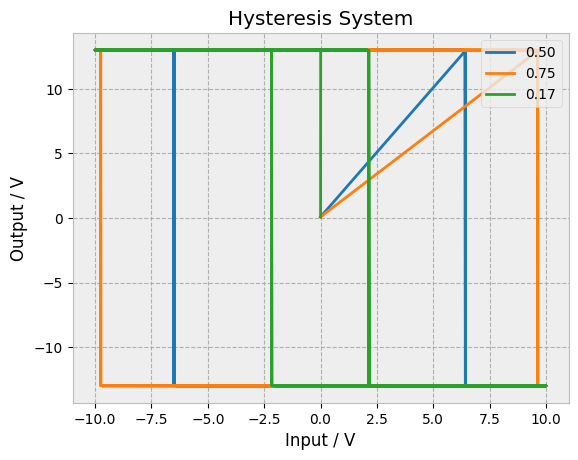

In [10]:
# ------------------------------------------------------------
# Compute Ratios
# ------------------------------------------------------------
rapports = np.array(list_R1) / (np.array(list_R1) + np.array(list_R2))


# ============================================================
# Output Voltage vs Load Resistance Plot
# ============================================================
plt.figure()

# ------------------------------------------------------------
# Plot Configuration
# ------------------------------------------------------------
plt.title("Hysteresis System")

# Plot curves for each input/output pair
for inputs, output, rapport in zip(input_list, output_list, rapports):
    plt.plot(inputs, output, label=f"{rapport:.2f}")

# ------------------------------------------------------------
# Axis Labels
# ------------------------------------------------------------
plt.xlabel("Input / V")
plt.ylabel("Output / V")

# ------------------------------------------------------------
# Legend
# ------------------------------------------------------------
plt.legend(loc="upper right")

# ------------------------------------------------------------
# Display Plot
# ------------------------------------------------------------
plt.show()


# ============================================================
# End of Plot
# ============================================================

It can be observed that the smaller the ratio, the narrower the hysteresis loop becomes.

## Asymmetric Hysteresis

It is possible to create asymmetric hysteresis. To achieve this, it is sufficient to adjust the system’s biasing voltage.

## Reference 

**Another notebook to better understand this notebook**
* add ...

**Youtube**
* [*Application Ampli.Op. : Comparateur à hystérésis (trigger de Schmitt) inversé*](https://www.youtube.com/watch?v=F3GaTp6SXJI)

## Writing Matrix

| Author | Reviewer | Approver | Section | Date 1 | Date 2 | Date 3 | General Remarks |
|--------|----------|----------|---------|--------|--------|--------|------------------|
| Sacha  | /        | /        | Entire document | 2026-01-01 | / | / | Initial draft of the full document |